In [1]:
import matplotlib
import matplotlib.pylab as plt
from matplotlib.dates import date2num, DateFormatter,\
    MonthLocator, WeekdayLocator, DayLocator, MinuteLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import numpy as np
import pandas as pd

In [2]:
frame = pd.DataFrame.from_csv('/tmp/bitstampUSD.out.csv')
frame.set_index(pd.to_datetime(frame.index, unit='s'), inplace=True)
frame.index.name = 'date'
frame['time'] = date2num(frame.index.to_pydatetime())
frame[:5]

,open,high,low,close,buy_order_type,buy_order_price,sell_order_type,sell_order_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time
date,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472
2016-01-01 00:10:00,432.38,432.38,431.46,431.46,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944
2016-01-01 00:15:00,432.38,432.58,431.47,431.47,NaN,NaN,LIMIT,435.75,0,0,1.0,0.0,431.47,735964.010417
2016-01-01 00:20:00,431.58,432.40,431.46,431.46,NaN,NaN,LIMIT,435.76,0,0,1.0,0.0,431.46,735964.013889


In [3]:
next_balance_frame = frame[['security_balance']].shift(-1).copy()
next_balance_frame.columns = ['security_balance_next']
next_frame = frame.join(next_balance_frame)
next_frame[:5]

,open,high,low,close,buy_order_type,buy_order_price,sell_order_type,sell_order_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time,security_balance_next
date,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000,1.0
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472,1.0
2016-01-01 00:10:00,432.38,432.38,431.46,431.46,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944,1.0
2016-01-01 00:15:00,432.38,432.58,431.47,431.47,NaN,NaN,LIMIT,435.75,0,0,1.0,0.0,431.47,735964.010417,1.0
2016-01-01 00:20:00,431.58,432.40,431.46,431.46,NaN,NaN,LIMIT,435.76,0,0,1.0,0.0,431.46,735964.013889,1.0


In [4]:
next_frame[np.abs(
    next_frame['security_balance'] -
    next_frame['security_balance_next']) > 0.01][:5]

,open,high,low,close,buy_order_type,buy_order_price,sell_order_type,sell_order_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time,security_balance_next
date,,,,,,,,,,,,,,,
2016-01-07 02:30:00,434.56,435.55,434.56,435.55,NaN,NaN,LIMIT,436.50,0,0,1.00,0.00,435.550,735970.104167,0.00
2016-01-07 07:45:00,448.00,450.00,447.66,450.00,LIMIT,443.36,NaN,NaN,0,0,0.00,437.36,437.360,735970.322917,0.98
2016-01-15 13:50:00,382.19,386.05,381.35,386.05,LIMIT,381.82,LIMIT,394.54,0,0,0.98,2.33,380.659,735978.576389,0.00
2016-01-15 14:15:00,390.12,392.47,389.10,389.10,LIMIT,387.22,NaN,NaN,0,0,0.00,387.83,387.830,735978.593750,1.00
2016-01-15 18:10:00,390.02,392.81,390.00,392.81,LIMIT,385.37,LIMIT,393.16,0,0,1.00,1.11,393.920,735978.756944,0.00


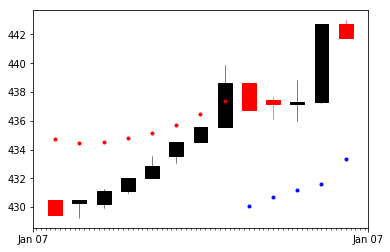

In [5]:
subframe = frame['2016-01-07 02:00':'2016-01-07 03:00']

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(MinuteLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.plot(
    subframe['time'].values,
    subframe['buy_order_price'].values,
    color='blue', linestyle='', marker='.')
ax.plot(
    subframe['time'].values,
    subframe['sell_order_price'].values,
    color='red', linestyle='', marker='.')
candlestick_ohlc(
    ax, subframe[
        ['time', 'open', 'high', 'low', 'close']
    ].values, width=0.002)

ax.xaxis_date()
ax.autoscale_view()

plt.show()

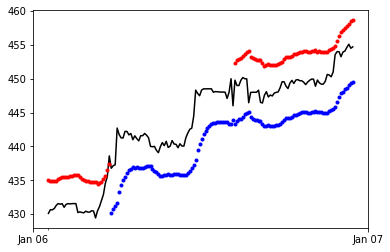

In [6]:
subframe = frame['2016-01-07 00':'2016-01-07 12']

fig, ax = plt.subplots()
ax.plot(
    subframe['time'],
    subframe['close'].values,
    color='black')
ax.plot(
    subframe['time'].values,
    subframe['buy_order_price'].values,
    color='blue', linestyle='', marker='.')
ax.plot(
    subframe['time'].values,
    subframe['sell_order_price'].values,
    color='red', linestyle='', marker='.')
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

plt.show()